In [1]:
import json
import matplotlib.pyplot as plt


In [2]:

def load_log(path):
    counters = []
    delays_ms = []

    with open(path, "r") as f:
        for line in f:
            if not line.strip():
                continue
            d = json.loads(line)
            counters.append(d["counter"])
            delays_ms.append((d["client_ts"] - d["server_ts"]) * 1000.0)

    return counters, delays_ms



In [3]:

# ====== CHANGE ONLY THESE TWO FILENAMES ======
tcp_log  = "tcp.log"
quic_log = "quic.log"
# =============================================

tcp_x, tcp_y = load_log(tcp_log)
quic_x, quic_y = load_log(quic_log)


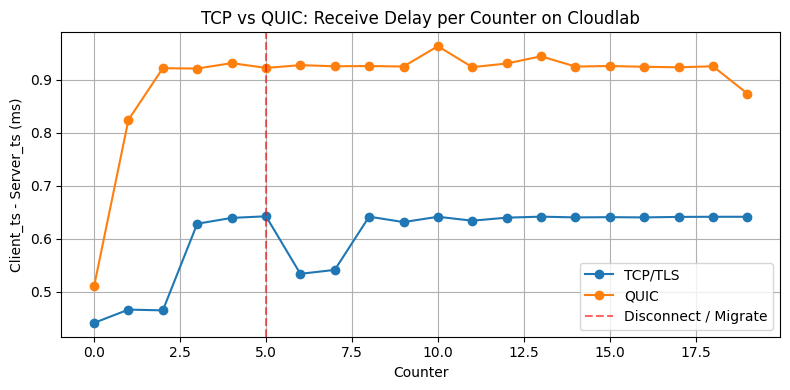

In [7]:

plt.figure(figsize=(8, 4))
plt.plot(tcp_x, tcp_y, marker="o", label="TCP/TLS")
plt.plot(quic_x, quic_y, marker="o", label="QUIC")
plt.axvline(x=5, linestyle="--", color='r', alpha=0.6, label="Disconnect / Migrate")
plt.xlabel("Counter")
plt.ylabel("Client_ts - Server_ts (ms)")
plt.title("TCP vs QUIC: Receive Delay per Counter on Cloudlab")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()